# Polyglot Unconference

This notebook holds a project conducting data analysis and visualization of the 2017 Polyglot Vancouver Un-Conference.

See the README in this repository for background information.



## Session 05 - "Kotlin"

This was an introduction to the Kotlin programming language, that was both tightly controlled by the host and encouraging of questions. 
There were several people that had either pointed questions or some experience with Kotlin (and the language(s) that the questioners were experienced with), which led to a fairly egalitarian discussion... at least compared to some of the other sessions.

### Python imports

In [1]:
# Imports

import sys
import pandas as pd
import csv

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# %load util.py
#!/usr/bin/python

# Util file to import in all of the notebooks to allow for easy code re-use


# Calculate Percent of Attendees that did not speak
def percent_silent(df):
    total = len(df)
    silent = 0
    for row in df.iteritems():
        if row[1] == 0:
            silent = silent + 1

    percent = {}
    percent['TOTAL'] = total
    percent['SILENT'] = silent
    percent['VERBOSE'] = total - silent
    return percent

# Calculate Percent of Attendees that left
def percent_left(df):
    total = len(df)
    left = 0
    for row in df.iteritems():
        if row[1] == 0:
            left = left + 1

    percent = {}
    percent['TOTAL'] = total
    percent['LEFT'] = left
    percent['STAYED'] = total - left
    return percent

# Calculate Percent of Attendees along gender
def percent_gender(df):
    total = len(df)
    female = 0
    for row in df.iteritems():
        if row[1] == 1:
            female = female + 1

    percent = {}
    percent['TOTAL'] = total
    percent['FEMALE'] = female
    percent['MALE'] = total - female
    return percent

# Calculate Percent of Talking points by
def percent_talking_gender(df):
    total = 0
    male = 0
    female = 0
    for talks, gender in df.itertuples(index=False):
        if talks > 0:
            total = total + 1
            if gender == 0:
                male = male + 1
            elif gender == 1:
                female = female + 1

    percent = {}
    percent['TOTAL'] = total
    percent['FEMALE'] = female
    percent['MALE'] = male
    return percent


### Reading the Data

In [3]:
# Read
data = pd.read_csv('data/5_kotlin.csv')

# Display
data

,PERSON,TALKS,GENDER,STAYED
0,H1,2 7,M,Y
1,01,1,M,Y
2,02,1,M,Y
3,03,0,M,Y
4,04,8,M,Y
5,05,12,M,Y
6,06,1,M,N
7,07,5,M,Y
8,08,1,M,N
9,09,1,M,Y


### Sanitizing the Data

As we can see, some of our data is stored in a non-numerical format which makes it difficult to perform the maths upon. 

Let's clean it up.

In [4]:
# Convert GENDER to Binary (sorry, i know...)

data.loc[data["GENDER"] == "M", "GENDER"] = 0
data.loc[data["GENDER"] == "F", "GENDER"] = 1

# Convert STAYED to 1 and Left/Late to 0

data.loc[data["STAYED"] == "Y", "STAYED"] = 1
data.loc[data["STAYED"] == "N", "STAYED"] = 0
data.loc[data["STAYED"] == "L", "STAYED"] = 0

# We should now see the data in numeric values
data

,PERSON,TALKS,GENDER,STAYED
0,H1,2 7,0,1
1,01,1,0,1
2,02,1,0,1
3,03,0,0,1
4,04,8,0,1
5,05,12,0,1
6,06,1,0,0
7,07,5,0,1
8,08,1,0,0
9,09,1,0,1


### Analysis and Visualization (V1)

Let's do some really basic passes at the data before we run some mathematical computations on it, just to get a better sense of where it stands at the moment.

In [5]:
# Run Describe to give us some basic Min/Max/Mean/Std values

data.describe()

,PERSON,TALKS,GENDER,STAYED
count,28,28,28,28
unique,28,11,2,2
top,20,0,0,1
freq,1,9,27,20


In [6]:
# Run Value_Counts in order to see some basic grouping by attribute

vc_talks = data['TALKS'].value_counts()
vc_talks

0      9
1      7
6      2
5      2
2      2
8      1
9      1
12     1
4      1
2 7    1
3      1
Name: TALKS, dtype: int64

In [7]:
vc_gender = data['GENDER'].value_counts()
vc_gender

0    27
1     1
Name: GENDER, dtype: int64

In [8]:
vc_stayed = data['STAYED'].value_counts()
vc_stayed

1    20
0     8
Name: STAYED, dtype: int64

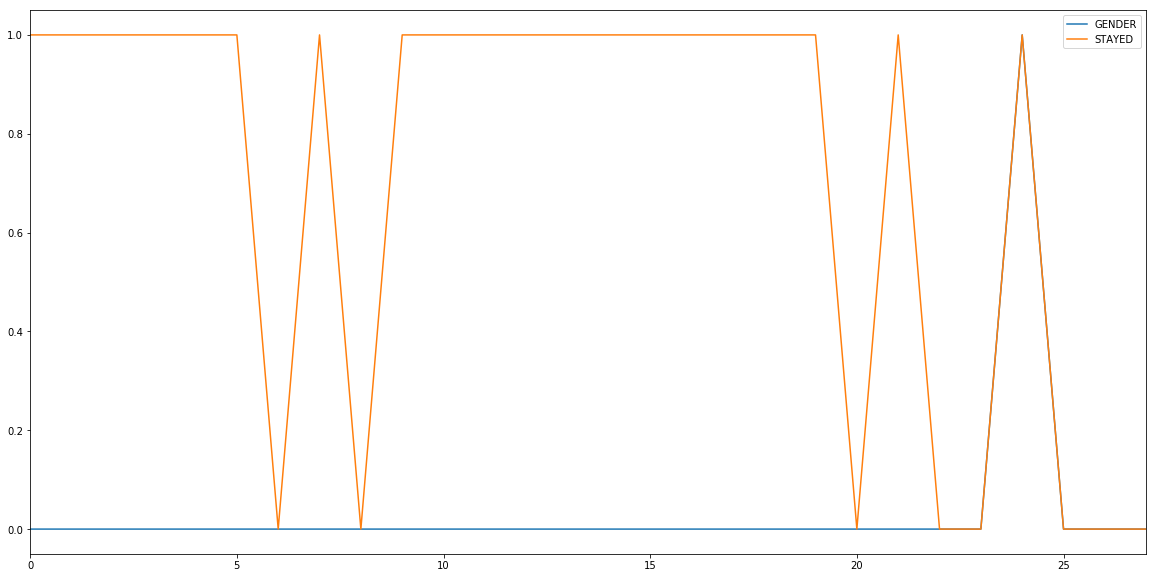

In [9]:
# Now let's do some basic plotting with MatPlotLib

data.plot()

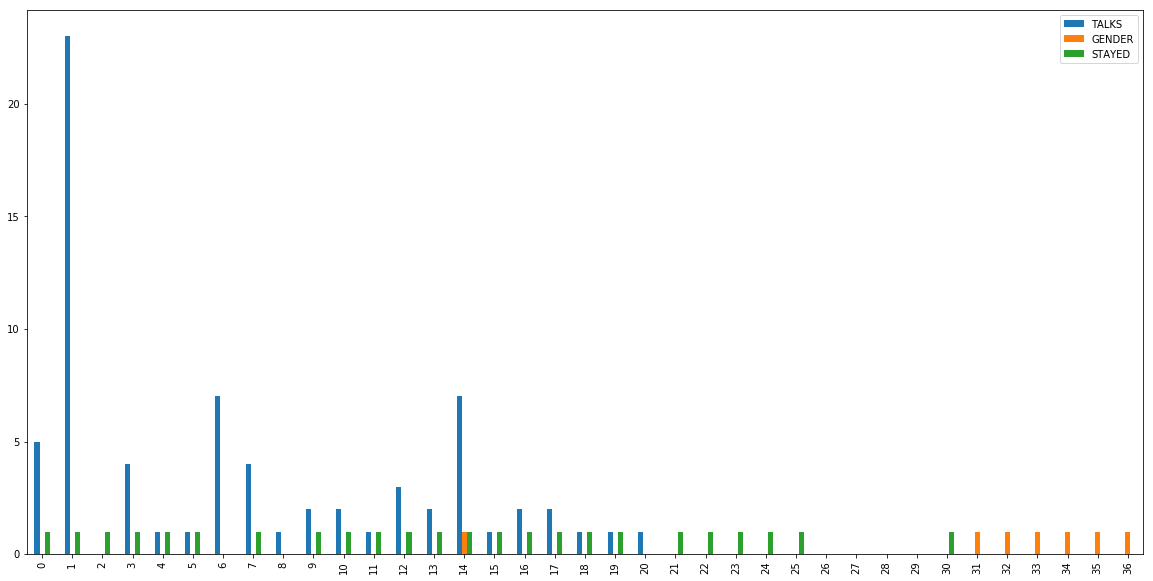

In [36]:
data.plot(kind='bar')

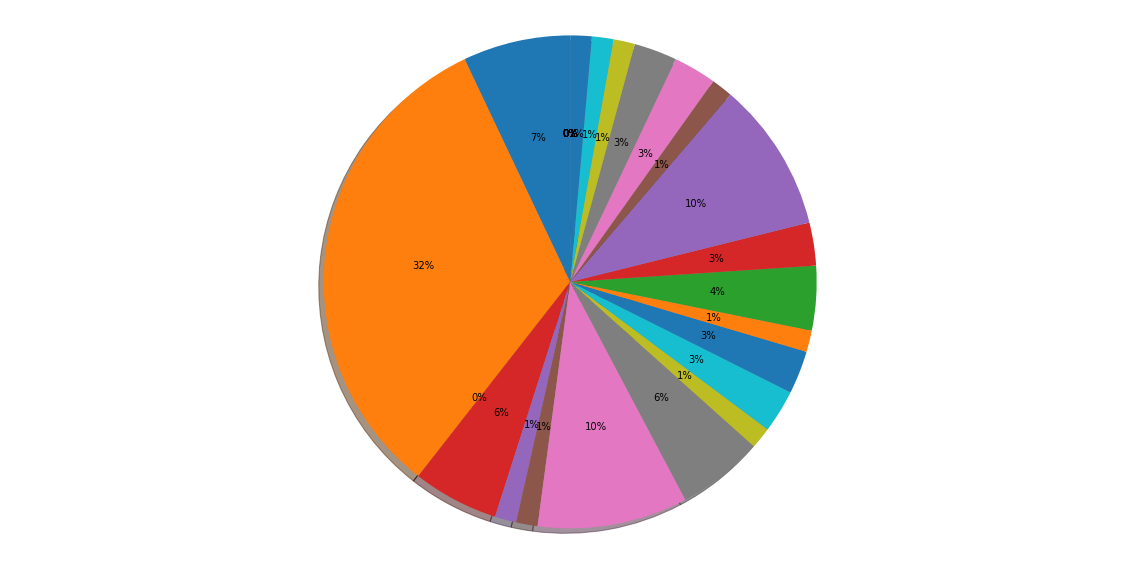

In [37]:
fig1, ax1 = plt.subplots()
ax1.pie(data['TALKS'], autopct='%1.f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Analysis and Visualization (V2)

As per the methodology in the first notebook, for the sake of mapping the actual conversational flow amongst the participants, I am going to run these analyses and visualizations again while removing the hosts...

In [38]:
data_hostless = data.drop(data.index[[0]])

In [39]:
data_hostless.head()

,PERSON,TALKS,GENDER,STAYED
1,01,23,0,1
2,02,0,0,1
3,03,4,0,1
4,04,1,0,1
5,05,1,0,1


In [40]:
data_hostless.describe()

,TALKS
count,36.000000
mean,1.833333
std,4.053217
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,23.000000


In [41]:
dh_vc_talks = data_hostless['TALKS'].value_counts()
dh_vc_talks

0     17
1      8
2      5
7      2
4      2
23     1
3      1
Name: TALKS, dtype: int64

In [42]:
dh_vc_gender = data_hostless['GENDER'].value_counts()
dh_vc_gender

0    29
1     7
Name: GENDER, dtype: int64

In [43]:
dh_vc_stayed = data_hostless['STAYED'].value_counts()
dh_vc_stayed

1    23
0    13
Name: STAYED, dtype: int64

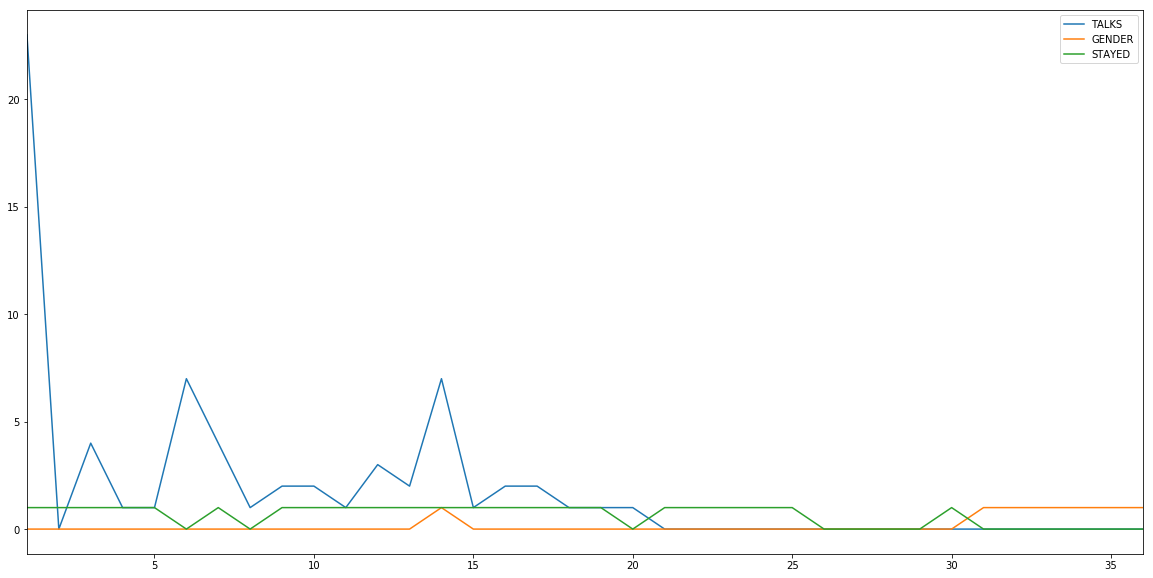

In [44]:
data_hostless.plot()

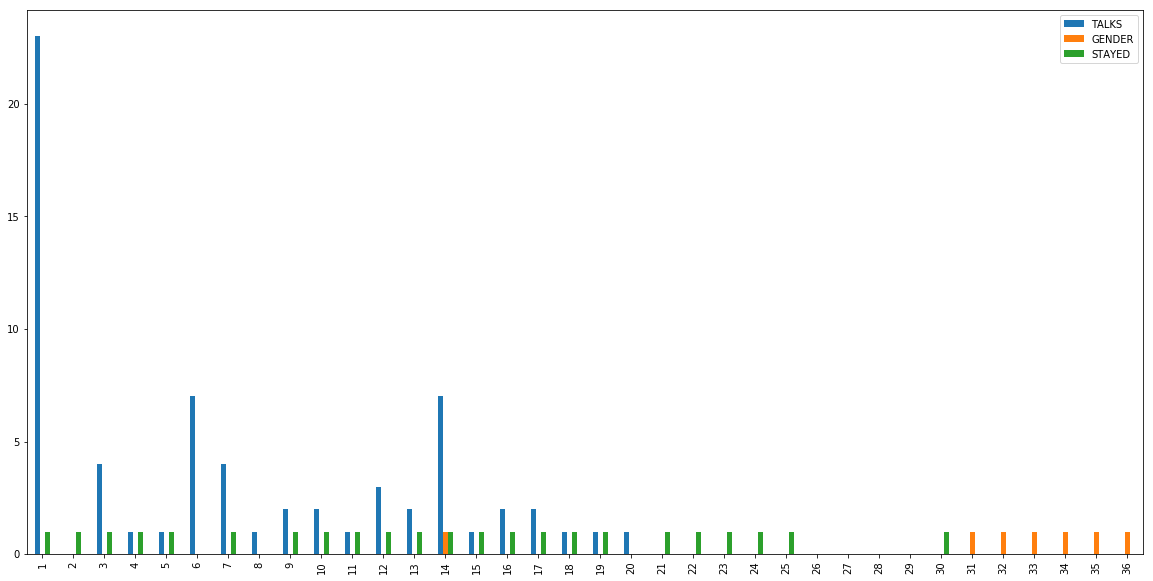

In [45]:
data_hostless.plot(kind='bar')

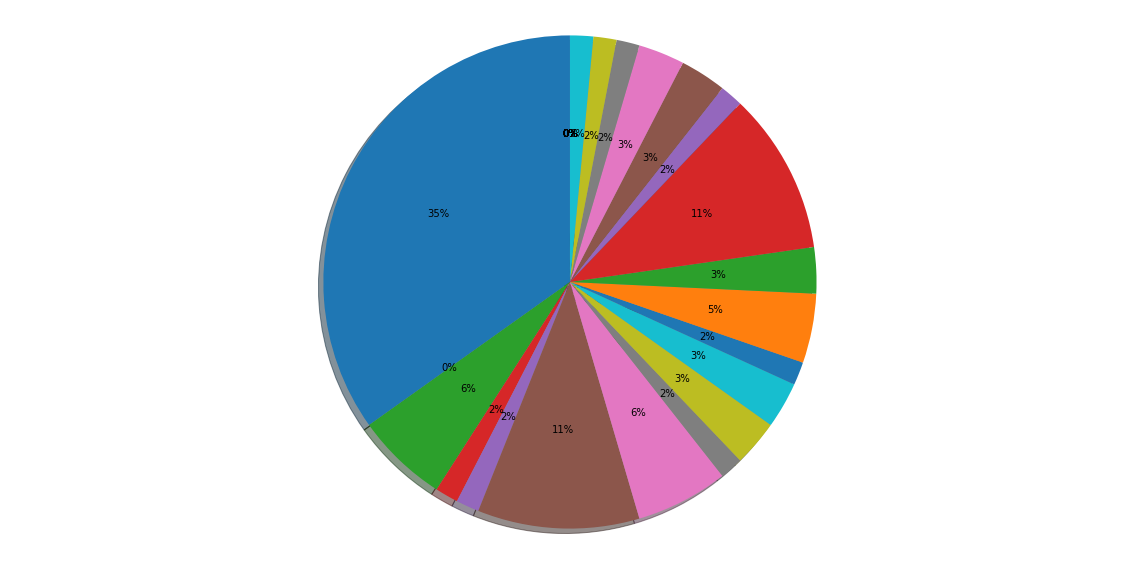

In [46]:
fig1, ax1 = plt.subplots()
ax1.pie(data_hostless['TALKS'], autopct='%1.f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

_this is still pretty bad..._

### Algebraic Analysis

Now lets step into some deeper (but probaby still naive) analysis based off of my rudiemtary understanding of Data Science! :D
 

In [47]:
# Percentage of attendees that were silent during the talk

silent = percent_silent(data['TALKS'])
silent


{'SILENT': 17, 'TOTAL': 37, 'VERBOSE': 20}

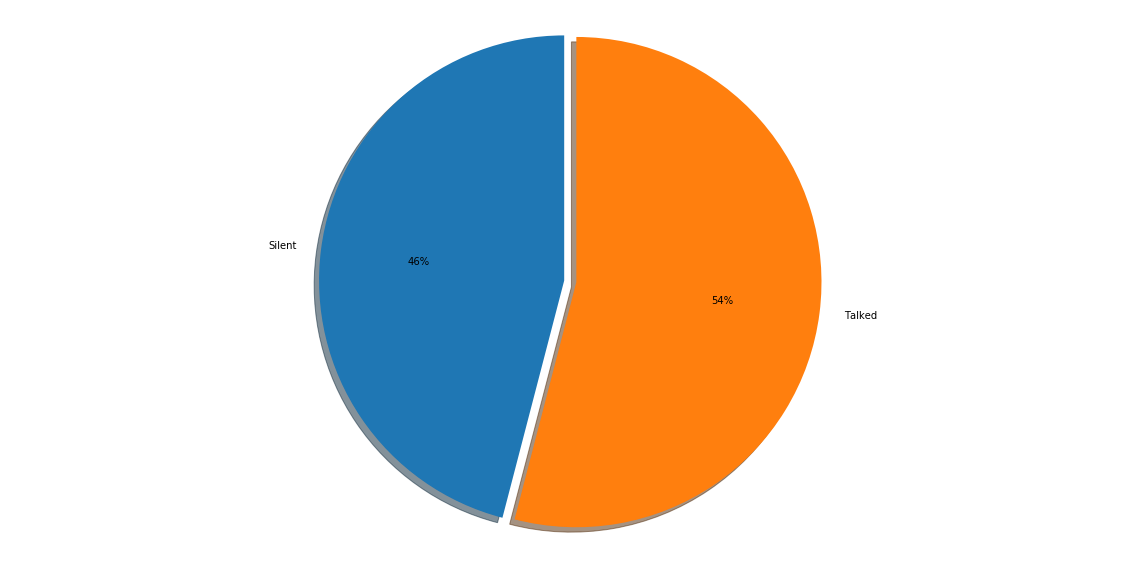

In [48]:
fig1, ax1 = plt.subplots()

sizes = [silent['SILENT'], silent['VERBOSE']]
labels = 'Silent', 'Talked'
explode = (0.05, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [49]:
# Percentage of attendees that left early during the talk

left = percent_left(data['STAYED'])
left

{'LEFT': 13, 'STAYED': 24, 'TOTAL': 37}

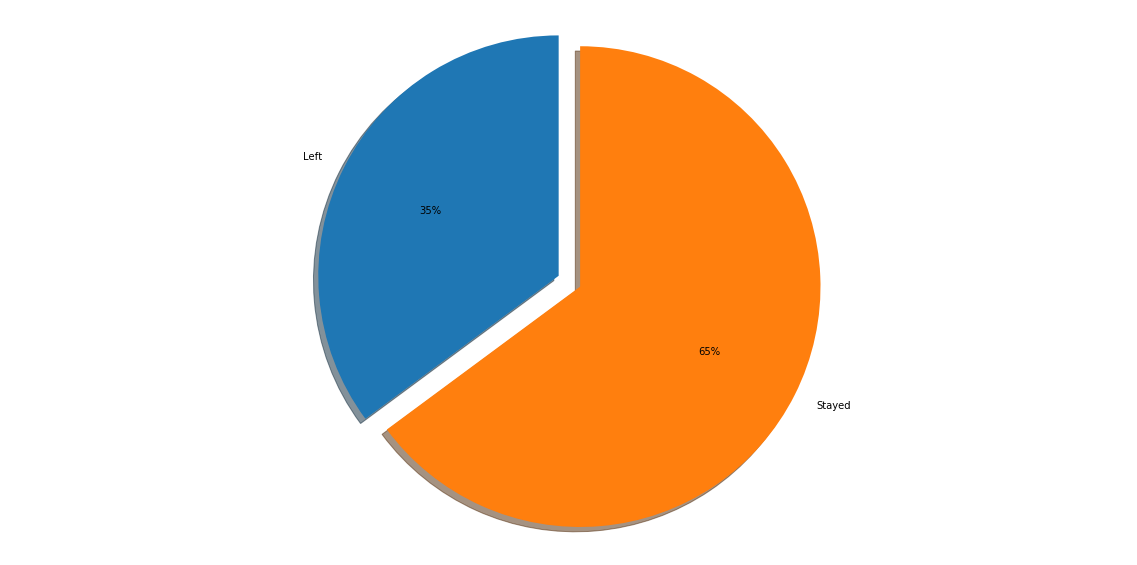

In [50]:
fig1, ax1 = plt.subplots()

sizes = [left['LEFT'], left['STAYED']]
labels = 'Left', 'Stayed'
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [51]:
# Percentage of attendees that were Male vs. Female (see notes above around methodology)

gender = percent_gender(data['GENDER'])
gender

{'FEMALE': 7, 'MALE': 30, 'TOTAL': 37}

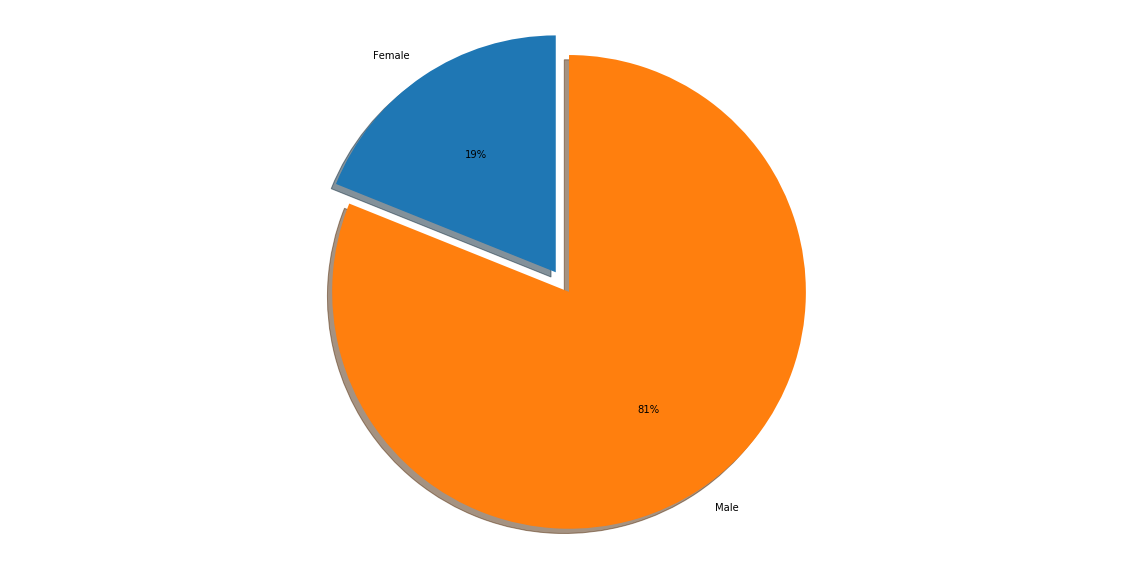

In [52]:
fig1, ax1 = plt.subplots()

sizes = [gender['FEMALE'], gender['MALE']]
labels = 'Female', 'Male'
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [53]:
# Calculate Percent of Talking points by GENDER

distribution = percent_talking_gender(data[['TALKS','GENDER']])
distribution

{'FEMALE': 1, 'MALE': 19, 'TOTAL': 20}

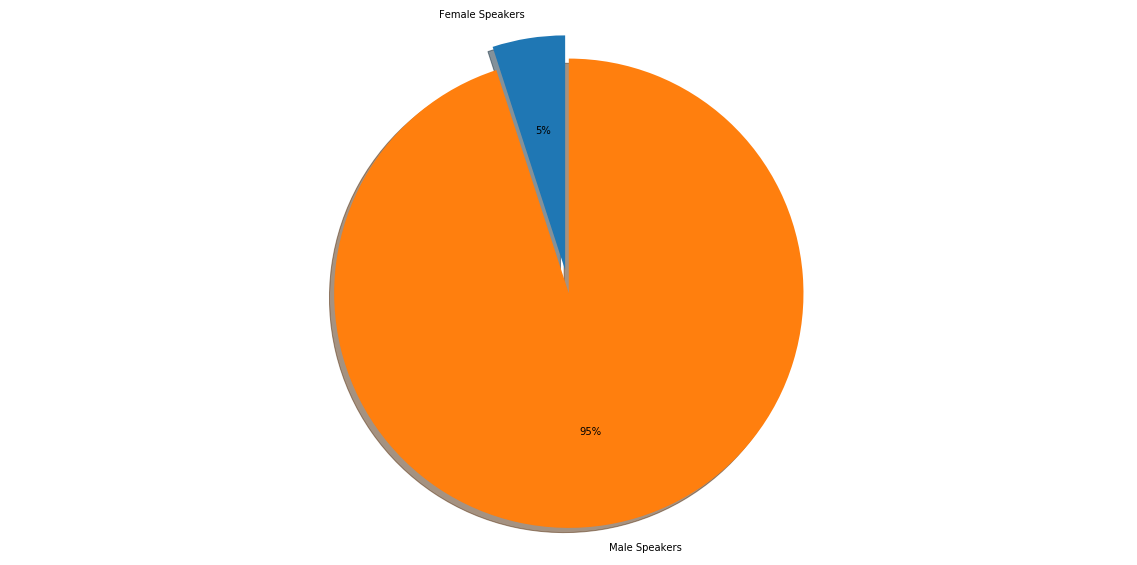

In [54]:
fig1, ax1 = plt.subplots()

sizes = [distribution['FEMALE'], distribution['MALE']]
labels = 'Female Speakers', 'Male Speakers'
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

_these numbers are damning..._